In [1]:
from load_config import load_config
from utils import model_from_config, load_newest, postprocess
from plotting.plotting import compare, make_visual
from evaluator import Evaluator
from datasets.preprocessor import Preprocessor_2p5D
import torch
from torchsummary import summary
import numpy as np

device='cuda'

In [2]:
config = load_config()
checkpoints_path = config['checkpoint_dir']

In [3]:
net = model_from_config(config).to(device)

In [4]:
model_parameters = filter(lambda p: p.requires_grad, net.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
print(f"{params:,}")

2,371,114


In [5]:
evaluator = Evaluator(config, net, device=device)

In [6]:
# dice = evaluator.evaluate_checkpoint(88200)

In [7]:
net = load_newest(checkpoints_path, net, device)

In [8]:
evaluator = Evaluator(config, net, device=device)

In [9]:
pre = Preprocessor_2p5D(config)

In [10]:
dp = pre.process(97)
vol, seg = dp.full_vol, dp.full_seg

In [11]:
pred = evaluator.evaluate(vol)

Total slices = 0
Total slices = 9
Total slices = 18
Total slices = 27
Total slices = 36
Total slices = 45
Total slices = 54
Total slices = 63
Total slices = 72
Total slices = 81
Total slices = 90
Total slices = 99
Total slices = 108
Total slices = 117
Total slices = 126
Total slices = 135
Total slices = 144
Total slices = 153
Total slices = 162
Total slices = 171
Total slices = 180
Total slices = 189
Total slices = 198
Total slices = 207
Total slices = 216
Total slices = 225
Total slices = 234
Total slices = 243
Total slices = 252
Total slices = 261
Total slices = 270
Total slices = 279
Total slices = 288
Total slices = 297
Total slices = 306
Total slices = 315
Total slices = 324
Total slices = 333
Total slices = 342
Total slices = 351
Total slices = 360
Total slices = 369
Total slices = 378
Total slices = 387
Total slices = 396
Total slices = 405
Total slices = 414
Total slices = 423
Total slices = 432
Total slices = 441
Total slices = 450
Total slices = 459
Total slices = 468
Total s

In [17]:
%matplotlib ipympl

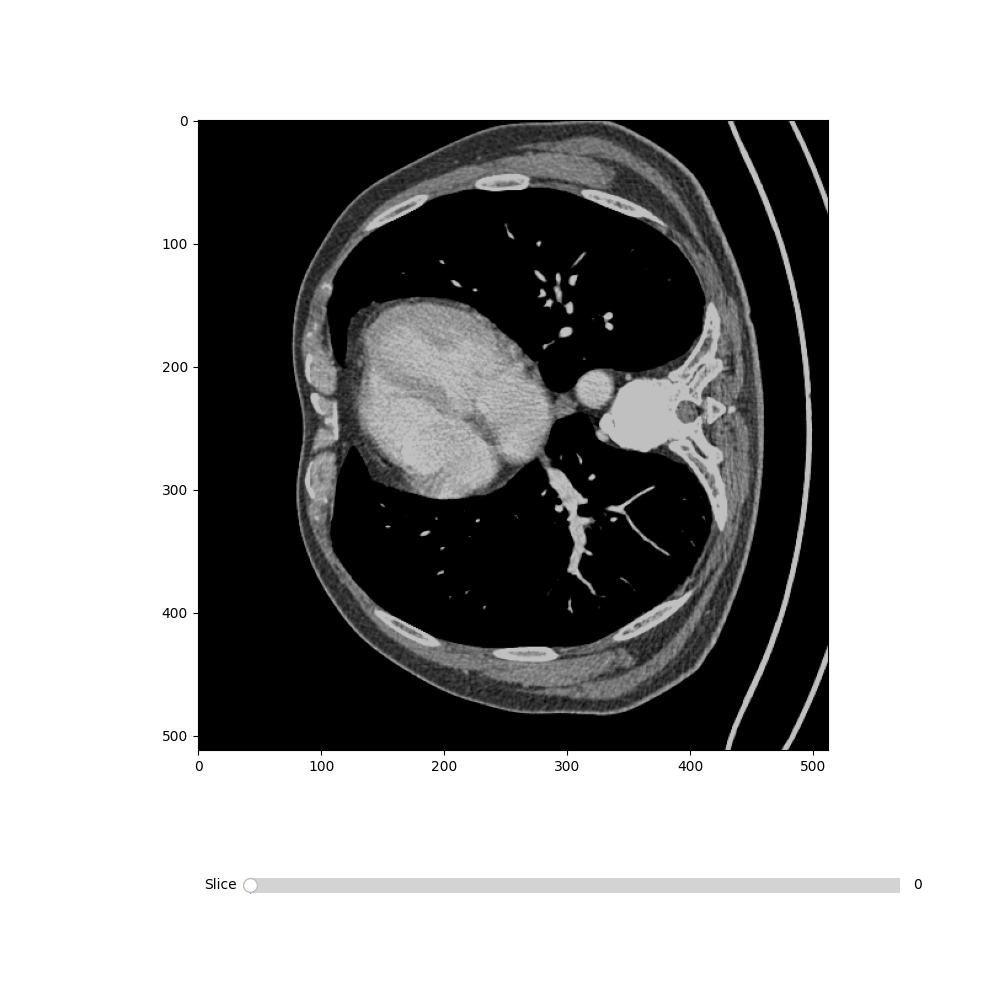

In [18]:
import matplotlib.pyplot as plt
slider = make_visual(vol, seg)

In [19]:
processed = postprocess(pred)

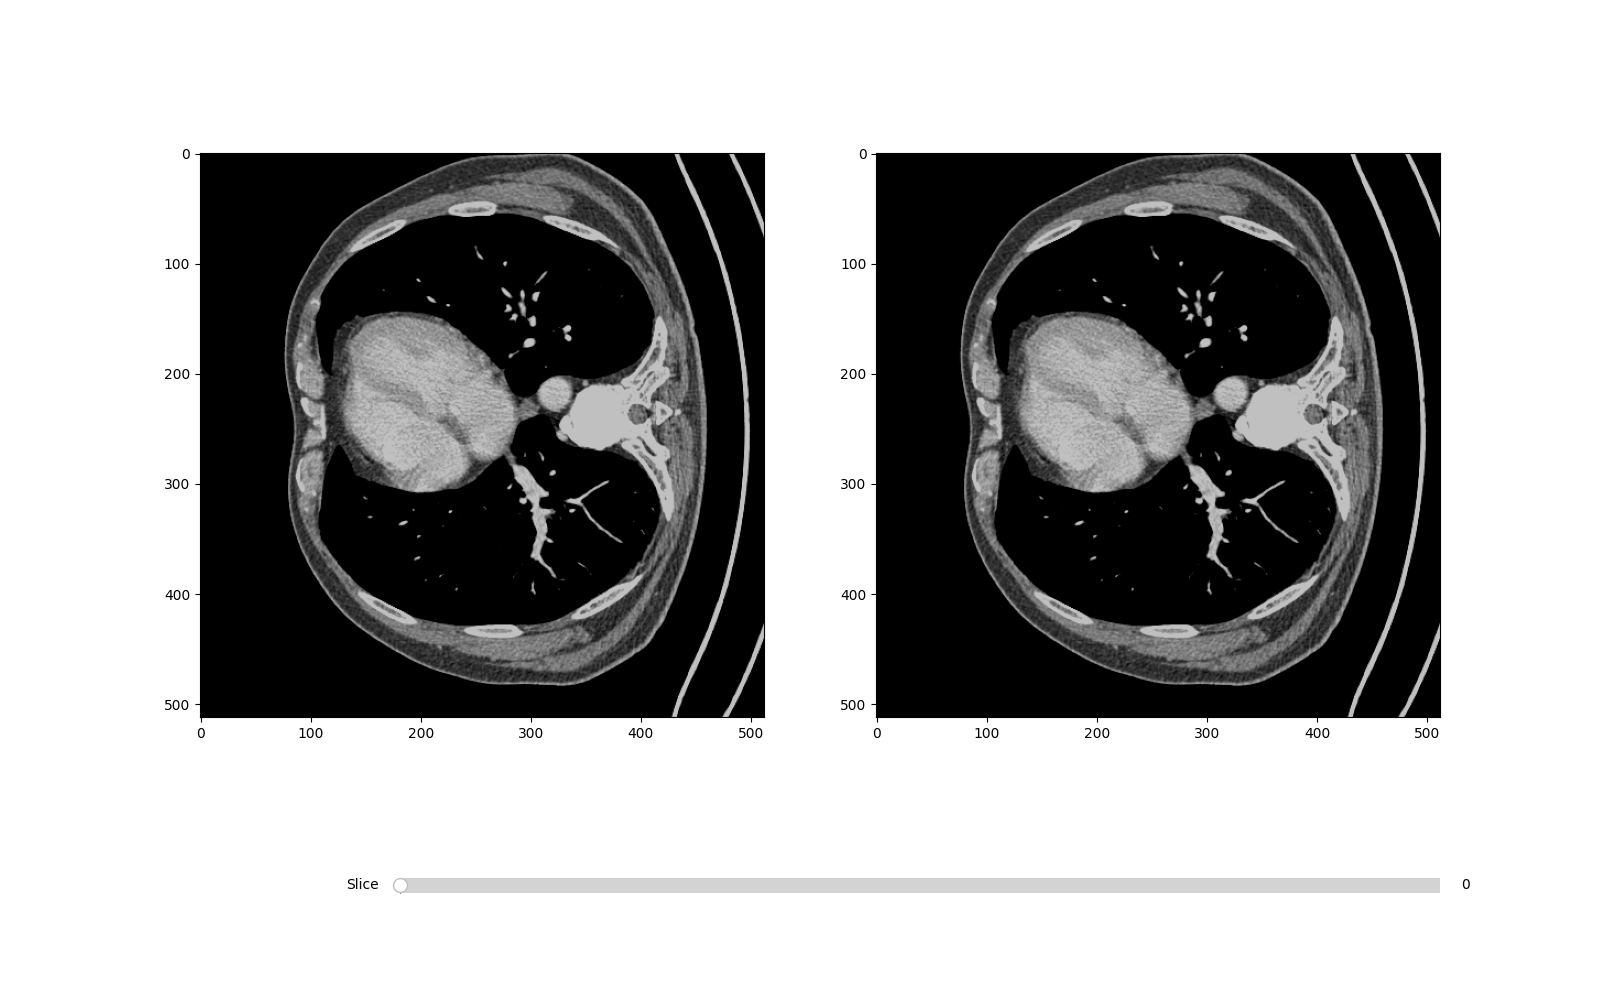

In [20]:
slider = compare(vol, pred, processed)

In [16]:
import matplotlib.pyplot as plt
plt.close()